# Data Science I - Natural Language Processing Project

## by Dingqing He & Klaas Mielck

submission date: 07.02.2021

# table of contents.
1. [data exploration](#ch1)
1. [data preparation](#ch2)
1. [data modelling](#ch3)
1. [evaluation](#ch4)

In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mielck\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mielck\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<a id="ch1"></a>
# 1) data exploration

In [2]:
# import data
df = pd.read_csv("output_320000.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head(2)

,Unnamed: 0,message,adjustedszz_bugfix,documentation_javainline,documentation_technicaldept_add,documentation_technicaldept_remove,issuefasttext_bugfix,issueonly_bugfix,issueonly_featureadd,refactoring_codebased,testchange_javacode,validated_bugfix,refactoring_keyword,documentation_javadoc,internal_quality_validated
0,0,MATH-1173: Tricubic interpolation\n\nNew class...,True,True,False,False,False,True,True,False,True,False,False,True,NaN
1,1,Add changelog entry for MATH-1155.\n,False,False,False,False,False,False,False,False,False,False,False,False,NaN


In [4]:
data1 = df[['message','internal_quality_validated']]

In [5]:
data1.head(3)

,message,internal_quality_validated
0,MATH-1173: Tricubic interpolation\n\nNew class...,NaN
1,Add changelog entry for MATH-1155.\n,NaN
2,Removed spurious @Override.\n\ngit-svn-id: htt...,NaN


In [6]:
# get labeled data
data2 = data1[(data1['internal_quality_validated'] == True) | (data1['internal_quality_validated'] == False)]

data2.head(3)

,message,internal_quality_validated
57,Fix javadoc: the type is an interface rather t...,True
95,Extract classes out of SphericalPolygonsSet so...,True
107,"Improved speed of FastMath.abs methods, by rem...",True


In [7]:
data2['internal_quality_validated'].unique()

array([True, False], dtype=object)

In [8]:
data2.count()

message                       2533
internal_quality_validated    2533
dtype: int64

In [9]:
data2.groupby('internal_quality_validated').count()

,message
internal_quality_validated,
False,1676
True,857


<a id="ch2"></a>
# 2) data preperation

In [10]:
data2['message'] = data2['message'].apply(lambda x: x.replace('\n', ' '))

data2.head()

<ipython-input-10-a41f8756f765>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['message'] = data2['message'].apply(lambda x: x.replace('\n', ' '))


,message,internal_quality_validated
57,Fix javadoc: the type is an interface rather t...,True
95,Extract classes out of SphericalPolygonsSet so...,True
107,"Improved speed of FastMath.abs methods, by rem...",True
112,"""final"" keyword. git-svn-id: https://svn.apa...",True
195,"In the constructor of IterationManager, remove...",True


In [11]:
data2['message'] = data2['message'].apply(lambda x: x.strip())

data2['message'].head()

<ipython-input-11-c2cad6f340f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['message'] = data2['message'].apply(lambda x: x.strip())


57     Fix javadoc: the type is an interface rather t...
95     Extract classes out of SphericalPolygonsSet so...
107    Improved speed of FastMath.abs methods, by rem...
112    "final" keyword.   git-svn-id: https://svn.apa...
195    In the constructor of IterationManager, remove...
Name: message, dtype: object

In [12]:
data2['message'] = data2['message'].apply(lambda x: x.lower())

data2['message'].head()

<ipython-input-12-e022003e3e8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['message'] = data2['message'].apply(lambda x: x.lower())


57     fix javadoc: the type is an interface rather t...
95     extract classes out of sphericalpolygonsset so...
107    improved speed of fastmath.abs methods, by rem...
112    "final" keyword.   git-svn-id: https://svn.apa...
195    in the constructor of iterationmanager, remove...
Name: message, dtype: object

In [13]:
import unicodedata
import sys

#create dict with puctuations
punctuation = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))
data2['message'] = [string.translate(punctuation) for string in data2['message']]

data2['message'].head(5)

<ipython-input-13-9167d3187da6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['message'] = [string.translate(punctuation) for string in data2['message']]


57     fix javadoc the type is an interface rather th...
95     extract classes out of sphericalpolygonsset so...
107    improved speed of fastmathabs methods by remov...
112    final keyword   gitsvnid httpssvnapacheorgrepo...
195    in the constructor of iterationmanager removed...
Name: message, dtype: object

In [14]:
# remove links
data2['message'] = data2['message'].apply(lambda x: " ".join(x for x in x.split() if (x[0:4] != 'http') & (x[0:4] != 'fbbf')))

data2['message'].head(5)

<ipython-input-14-4ac8e2369f50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['message'] = data2['message'].apply(lambda x: " ".join(x for x in x.split() if (x[0:4] != 'http') & (x[0:4] != 'fbbf')))


57     fix javadoc the type is an interface rather th...
95     extract classes out of sphericalpolygonsset so...
107    improved speed of fastmathabs methods by remov...
112    final keyword gitsvnid 13f7953547bb03109956ffa...
195    in the constructor of iterationmanager removed...
Name: message, dtype: object

In [15]:
# tokenizing
from nltk.tokenize import word_tokenize

data2['message'] = data2['message'].apply(lambda x: word_tokenize(x))

data2.head(3)

<ipython-input-15-efed27ffb588>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['message'] = data2['message'].apply(lambda x: word_tokenize(x))


,message,internal_quality_validated
57,"[fix, javadoc, the, type, is, an, interface, r...",True
95,"[extract, classes, out, of, sphericalpolygonss...",True
107,"[improved, speed, of, fastmathabs, methods, by...",True


In [16]:
# removing stopwords
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

data2['message'] = data2['message'].apply(lambda x: [word for word in x if word not in stop_words])

data2.head(5)

<ipython-input-16-45ca19d9fa2d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['message'] = data2['message'].apply(lambda x: [word for word in x if word not in stop_words])


,message,internal_quality_validated
57,"[fix, javadoc, type, interface, rather, abstra...",True
95,"[extract, classes, sphericalpolygonsset, sourc...",True
107,"[improved, speed, fastmathabs, methods, removi...",True
112,"[final, keyword, gitsvnid, 13f7953547bb0310995...",True
195,"[constructor, iterationmanager, removed, check...",True


In [17]:
#remove special words
words_to_remove = ['gitsvnid', '>', '<', '13f7953547bb03109956ffa450edef68']
data2['message'] = data2['message'].apply(lambda x: [word for word in x if word not in words_to_remove])
data2['message'].head(5)

<ipython-input-17-c10f2a9d19c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['message'] = data2['message'].apply(lambda x: [word for word in x if word not in words_to_remove])


57     [fix, javadoc, type, interface, rather, abstra...
95     [extract, classes, sphericalpolygonsset, sourc...
107    [improved, speed, fastmathabs, methods, removi...
112                                     [final, keyword]
195    [constructor, iterationmanager, removed, check...
Name: message, dtype: object

In [18]:
# stemming
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

data2['message'] = data2['message'].apply(lambda x: [porter.stem(word) for word in x])

data2.head()

<ipython-input-18-0cf6253088a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['message'] = data2['message'].apply(lambda x: [porter.stem(word) for word in x])


,message,internal_quality_validated
57,"[fix, javadoc, type, interfac, rather, abstrac...",True
95,"[extract, class, sphericalpolygonsset, sourc, ...",True
107,"[improv, speed, fastmathab, method, remov, bra...",True
112,"[final, keyword]",True
195,"[constructor, iterationmanag, remov, check, nu...",True


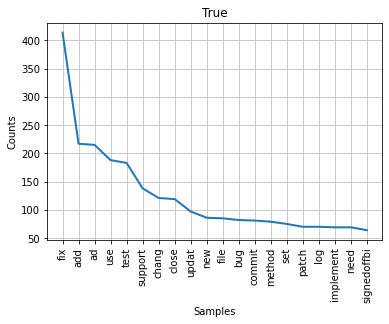

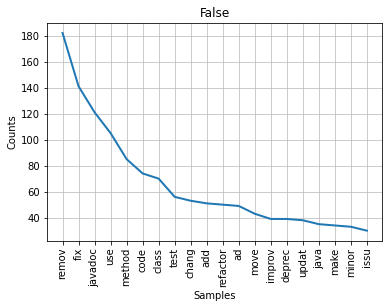

<AxesSubplot:title={'center':'False'}, xlabel='Samples', ylabel='Counts'>

In [19]:
# count words
from nltk.probability import FreqDist

data_false = data2[data2['internal_quality_validated'] == False]['message'].sum()
data_true = data2[data2['internal_quality_validated'] == True]['message'].sum()

freq_true = FreqDist(data_false)
freq_false = FreqDist(data_true)

freq_true.plot(20, title='True')
freq_false.plot(20, title='False')

In [20]:
#to strings
data2['message'] = data2['message'].apply(lambda x: " ".join(x))

<ipython-input-20-a59aad7887bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['message'] = data2['message'].apply(lambda x: " ".join(x))


In [21]:
X = data2['message']
y = data2['internal_quality_validated'].astype('bool')

In [22]:
X.head()

57       fix javadoc type interfac rather abstract class
95     extract class sphericalpolygonsset sourc file ...
107    improv speed fastmathab method remov branch ji...
112                                        final keyword
195    constructor iterationmanag remov check null ar...
Name: message, dtype: object

In [23]:
y.unique()

array([ True, False])

<a id="ch3"></a>
# 3) data modelling

In [24]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate


MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
]


df_compare = pd.DataFrame(columns=['model', 'parameters', 'fit_time', 'accuracy', 'precision', 'recall', 'f1'])
row_index = 0

for alg in MLA:
    pipe = Pipeline([
    #bag of words
    ('count', CountVectorizer()),
    #TfidfVectorizer
    #('tfidf', TfidfVectorizer()),
    ('alg', alg,)
    ])

    scores = cross_validate(pipe, X, y, cv=5, scoring=['accuracy','precision','recall','f1'])
    
    MLA_name = alg.__class__.__name__  
    df_compare.loc[row_index, 'model'] = MLA_name
    df_compare.loc[row_index, 'parameters'] = str(alg.get_params())
    df_compare.loc[row_index, 'fit_time'] = scores['fit_time'].mean()
    df_compare.loc[row_index, 'accuracy'] = scores['test_accuracy'].mean()
    df_compare.loc[row_index, 'precision'] = scores['test_precision'].mean()
    df_compare.loc[row_index, 'recall'] = scores['test_recall'].mean()
    df_compare.loc[row_index, 'f1'] = scores['test_f1'].mean()

    
    row_index += 1
    
print('Finished.')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Finished.


In [25]:
df_compare['mean of scorings'] = df_compare[['accuracy','precision','recall','f1']].mean(axis=1)
df_compare = df_compare.sort_values(by=['mean of scorings'], ascending=False)

df_compare.head(10)

,model,parameters,fit_time,accuracy,precision,recall,f1,mean of scorings
5,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",2.16437,0.838139,0.800004,0.700075,0.745216,0.770858
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",1.25867,0.829059,0.764339,0.723439,0.74005,0.764222
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.839637,0.831032,0.780473,0.701278,0.736525,0.762327
14,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.035697,0.817618,0.734048,0.731606,0.731078,0.753588
10,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.0275264,0.832607,0.89211,0.578818,0.699337,0.750718
7,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",1.67148,0.827871,0.836961,0.613736,0.705287,0.745964
8,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_wei...",0.0297205,0.808137,0.720653,0.716401,0.716375,0.740392
6,PassiveAggressiveClassifier,"{'C': 1.0, 'average': False, 'class_weight': N...",0.0319147,0.804977,0.708611,0.726887,0.716449,0.739231
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.873211,0.814057,0.753978,0.675575,0.709636,0.738312
13,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",1.51776,0.825106,0.867212,0.571773,0.686884,0.737744


Based on the MLA comparision, we decided to choose the RandomForestClassifier because of a high accuarcy and a high mean of all four scorings.

In addition the RandomForestClassifier runs quickly.

In [26]:
# grid search cv
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('count', CountVectorizer()),
    ('classifier', ensemble.RandomForestClassifier(),)
    ])

search_space = [{"classifier": [ensemble.RandomForestClassifier()], "classifier__n_estimators": [10, 100, 1000], "classifier__max_features": [1, 2, 3]}]

gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

best_rfc = gridsearch.fit(X_train, y_train)

In [28]:
# best parameters
#best_rfc.best_estimator_.get_params()

print('best n_estimatores:', best_rfc.best_estimator_.get_params()['classifier__n_estimators'])
print('max_features:', best_rfc.best_estimator_.get_params()['classifier__max_features'])

best n_estimatores: 1000
max_features: 1


<a id="ch4"></a>
# 4) evaluation

[[513  49]
 [ 91 183]]


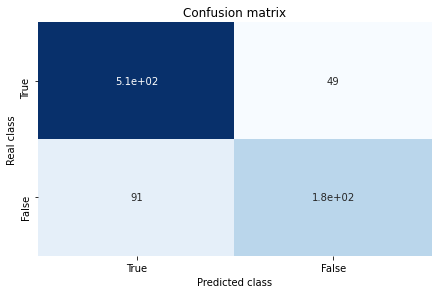

In [31]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_predict = best_rfc.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print(matrix)

class_names = ['True', 'False']

dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion matrix"), plt.tight_layout()
plt.ylabel("Real class"), plt.xlabel("Predicted class")
plt.show()

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       False       0.85      0.91      0.88       562
        True       0.79      0.67      0.72       274

    accuracy                           0.83       836
   macro avg       0.82      0.79      0.80       836
weighted avg       0.83      0.83      0.83       836

